In [11]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score

from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer

import time
from operator import itemgetter



In [12]:
path = 'credit.data'
data = pd.read_csv(path, delimiter='	',header=None, na_values='?')
##data = pd.DataFrame(data)
data = data.dropna(axis=0, how='any')
cible = data[15]##.values.reshape(-1,1)
###cible  = pd.DataFrame(data=cible)
cible = cible.replace(to_replace='+', value=1)
cible = cible.replace(to_replace='-', value=0)
data = data.drop(15, axis=1)
sous_ensemble = data[[1,2,7,13,14]]
sous_ensemble = sous_ensemble.astype(float)



path = 'credit.data'
data = pd.read_csv(path, delimiter='	',header=None, na_values='?')
data_num = data[[1,2,7,13,14]]
data_cat = data[[3,4,5,6,8,9,10,11,12]]
data_cat = data_cat.astype(str)
cible_final = data[15]
cible_final = cible_final.replace(to_replace='+', value=1)
cible_final = cible_final.replace(to_replace='-', value=0)




gnb = GaussianNB()


X_train, X_test, y_train, y_test = train_test_split(sous_ensemble, 
                                                    cible, 
                                                    test_size=0.2, 
                                                    random_state=42)

# ROC

In [13]:
def TP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] > theta and x == 1:
            count += 1
        i += 1
    return count


def FP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] >= theta and x == 0:
            count += 1
        i += 1
    return count


def TN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 0:
            count += 1
        i += 1
    return count


def FN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 1:
            count += 1
        i += 1
    return count


class ROC_curves:
    def __init__(self,
                 pred=sous_ensemble,
                 res=cible,
                 gran = 101):
        x = []
        y = []
        for j in range(0,gran):
            tn = TN(j/(gran-1),pred,res)
            neg = tn + FP(j/(gran-1),pred,res)
            tp = TP(j/(gran-1),pred,res)
            pos = tp + FN(j/(gran-1),pred,res)

            if neg == 0:
                x.append(0)
            else:
                x.append(tn / neg)
            if pos == 0:
                y.append(0)
            else:
                y.append(tp / pos)
      
        self.rocx = x
        self.rocy = y
    def plot_it(self):
        plt.plot(self.rocx,self.rocy)
        plt.show()

# Qualité

In [14]:
class Qualite:
    def __init__(self, 
                   _modele=gnb, 
                   _data=sous_ensemble, 
                   _y=cible, 
                   _y_pred=cible,
                   _y_pred_proba=cible,
                   _cv=10,
                   _print_mode=True):
        
        self.accuracy = sklearn.metrics.accuracy_score(_y, _y_pred)
        self.AUC = sklearn.metrics.roc_auc_score(_y, _y_pred)
        self.cross_validation = cross_val_score(_modele, _data, y=_y, cv=_cv)
        self.moyenne = np.mean(self.cross_validation)
        self.ecart_type = np.std(self.cross_validation)
        self.precision = average_precision_score(_y, _y_pred)
        
        self.roc = ROC_curves(pred=_y_pred_proba, res=_y)
        
        
        if _print_mode:
            self.roc.plot_it()

# Apprentissage

In [15]:
def algo_apprentissage(mod=GaussianNB(),
                           data=sous_ensemble,
                           target=cible,
                           print_mode=True,
                           cv=10):
    X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=42)
    result = dict()
    mod_fit = mod.fit(X_train, y_train)
    y_prediction_proba = mod_fit.predict_proba(X_test)
    y_prediction = mod_fit.predict(X_test)
    q_mod = Qualite(_modele=mod,
                 _data=X_test,
                 _y=y_test,
                 _y_pred=y_prediction,
                 _y_pred_proba=y_prediction_proba,
                 _print_mode=print_mode,
                 _cv=cv)
    
    result['y_prediction_proba'] = y_prediction_proba
    result['y_prediction'] = y_prediction
    result['q_mod'] = q_mod
    
    if print_mode:
        print('La précision est ' + str(q_mod.accuracy))
        print('')
        print('L\'AUC est ' + str(q_mod.AUC))
        print('')
        print('Le score moyen par ' + str(cv) + ' cross-validation est ' + str(q_mod.moyenne))
    
    return result

# NaiveBayesSimple

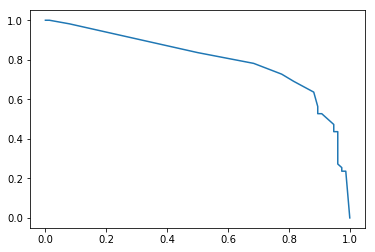

La précision est 0.740458015267

L'AUC est 0.700956937799

Le score moyen par 10 cross-validation est 0.745879120879


In [16]:
GNB = GaussianNB()
gnb = algo_apprentissage(GNB)

# Arbre CART

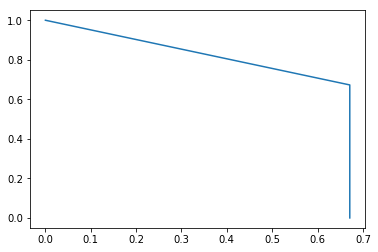

La précision est 0.671755725191

L'AUC est 0.671889952153

Le score moyen par 10 cross-validation est 0.801923076923


In [17]:
DTC = tree.DecisionTreeClassifier()
dtc = algo_apprentissage(DTC)

# Arbre ID3

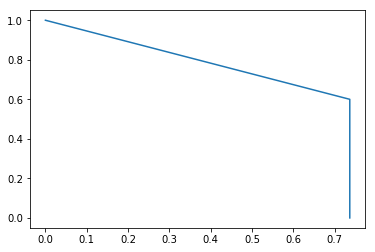

La précision est 0.679389312977

L'AUC est 0.668421052632

Le score moyen par 10 cross-validation est 0.732875457875


In [18]:
id3 = tree.DecisionTreeClassifier(criterion="entropy")
essai = algo_apprentissage(id3)

# Decision Stump

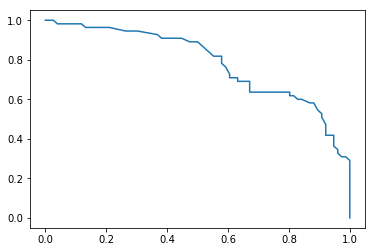

La précision est 0.732824427481

L'AUC est 0.716985645933

Le score moyen par 10 cross-validation est 0.767307692308


In [19]:
decision_stump = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0)

ds = algo_apprentissage(decision_stump)

# MLP

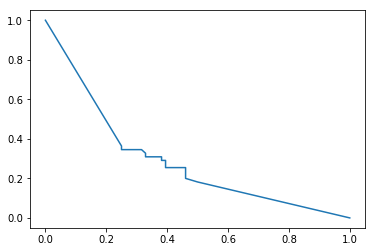

La précision est 0.351145038168

L'AUC est 0.34533492823

Le score moyen par 10 cross-validation est 0.780586080586


In [20]:
MLP = MLPClassifier(solver='lbfgs',
                    alpha=1,
                    hidden_layer_sizes=(20, 10))

mlp = algo_apprentissage(MLP)

# KNN

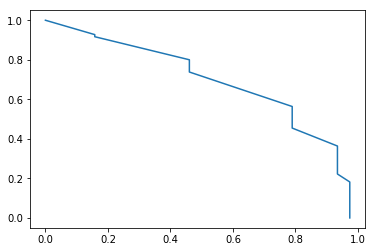

La précision est 0.69465648855

L'AUC est 0.676555023923

Le score moyen par 10 cross-validation est 0.770512820513


In [21]:
KNN = KNeighborsClassifier()
knn = algo_apprentissage(KNN)

# Bagging 

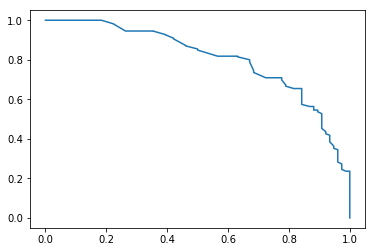

La précision est 0.763358778626

L'AUC est 0.748325358852

Le score moyen par 10 cross-validation est 0.804853479853


In [22]:
BC = BaggingClassifier(n_estimators=50)
bc = algo_apprentissage(BC)

# Adaboost

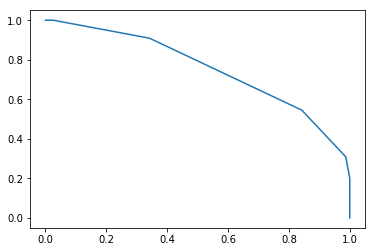

La précision est 0.717557251908

L'AUC est 0.693779904306

Le score moyen par 10 cross-validation est 0.697802197802


In [23]:
ABC = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1.0,
                         algorithm='SAMME.R',
                         random_state=None)
abc = algo_apprentissage(ABC)

# RandomForest

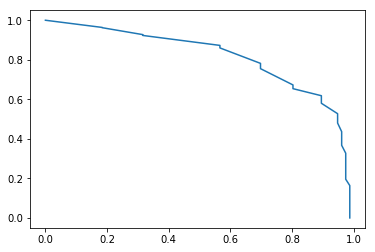

La précision est 0.778625954198

L'AUC est 0.756459330144

Le score moyen par 10 cross-validation est 0.739377289377


In [24]:
RFC = RandomForestClassifier(n_estimators=10,
                             criterion='gini',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features='auto',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             bootstrap=True,
                             oob_score=False,
                             n_jobs=1,
                             random_state=None,
                             verbose=0,
                             warm_start=False,
                             class_weight=None)

rfc = algo_apprentissage(RFC)

In [25]:
def pca_transform(data=sous_ensemble,
        target=cible,
        variance=0.7,
        print_mode=True,
        normalized=True,
        min_max_ed=False):
    if normalized:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    elif min_max_ed:
        scaler = MinMaxScaler()
        data = scaler.fit_transform(data)
        
        
    for x in range(len(data[0])):
        pca = PCA(n_components=x)
        pca.fit(data)
        if sum(pca.explained_variance_ratio_) > variance:## and x >1:
            if print_mode:
                print('Hello World')
            break
    X_pca = pca.fit_transform(data)
    if print_mode:
        plt.scatter(X_pca[:, 0], X_pca[:, 1])
        plt.show()
        plt.close()
    return [pca,X_pca]
        
        
pca_data = pca_transform(normalized=True, print_mode=False)[1]



In [26]:
colnames = ['Accuracy', 'AUC', 'Moyenne CV', 'Std CV', 'Temps']
algos = [KNN, DTC, id3, BC, RFC]
indexs = ['KNN', 'DTC', 'id3', 'BC', 'RFC']
clfs = dict()
for x in range(len(algos)):
    clfs[indexs[x]] = algos[x]
    
    
    
def final_table(mode=None,
                data=sous_ensemble,
                col=colnames,
                algos=algos,
                indexs=indexs):
    if mode is None:
        pass
    elif mode == 'normalized':
        scaler = StandardScaler()
        scaler.fit(data)
        data = scaler.transform(data)
    elif mode == 'min_max_ed':
        scaler = MinMaxScaler()
        scaler.fit(data)
        data = scaler.transform(data)
    elif mode == 'pca':
        data = pca_transform(data=data,
                                 normalized=True,
                                 print_mode=False)[1]


    result = []
    for alg in algos:
        t1 = time.time()
        res_algo = algo_apprentissage(alg, data=data, target=cible,print_mode=False)
        t2 = time.time()
        delta_t = t2 - t1
        ajout = [res_algo['q_mod'].accuracy, res_algo['q_mod'].AUC, res_algo['q_mod'].moyenne, res_algo['q_mod'].ecart_type, delta_t]
        result.append(ajout)

    result = pd.DataFrame(result, columns=colnames, index=indexs)
    return result

modes = [None, 'normalized', 'min_max_ed', 'pca']

tables = dict()
for mode in modes:
    event = dict()
    tables[str(mode)] = final_table(mode=mode)

In [27]:
def run_classifiers(classifiers=clfs,
                    X=sous_ensemble,
                    Y=cible,
                    print_mode=True,
                    n_splits=10,
                    mode=None):
    
    if mode is None:
        pass
    elif mode == 'normalized':
        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
    elif mode == 'min_max_ed':
        scaler = MinMaxScaler()
        scaler.fit(X)
        X == scaler.transform(X)
    elif mode == 'pca':
        X = pca_transform(data=X,
                          normalized=True,
                          print_mode=False)[1]

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0) 

    result = []
    
    for i in classifiers:
        clf = classifiers[i]
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        if print_mode:
            print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        result.append([i,np.mean(cv_acc)])
    
    result = sorted(result, key=itemgetter(1), reverse=True)
    return result


rc = run_classifiers(mode='min_max_ed', print_mode=True)

Accuracy for KNN is: 0.683 +/- 0.053
Accuracy for DTC is: 0.672 +/- 0.064
Accuracy for id3 is: 0.686 +/- 0.066
Accuracy for BC is: 0.706 +/- 0.063
Accuracy for RFC is: 0.720 +/- 0.069


In [28]:
tables['None']

,Accuracy,AUC,Moyenne CV,Std CV,Temps
KNN,0.694656,0.676555,0.770513,0.125371,0.056881
DTC,0.656489,0.651196,0.795971,0.061225,0.056101
id3,0.725191,0.710407,0.770971,0.108952,0.054077
BC,0.748092,0.737679,0.819139,0.090189,0.727319
RFC,0.740458,0.721053,0.773260,0.109510,0.191472


In [29]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(sous_ensemble, cible)
importances = forest.feature_importances_

In [30]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train).predict(X_test)


array([ 0.9,  0.9,  1. ,  0.6,  0.1,  0.3,  0.2,  0.9,  0.5,  0. ,  1. ,
        0. ,  0.1,  0.4,  0. ,  0.3,  0.8,  0.7,  0.8,  0.2,  0.8,  0.6,
        0.4,  0.6,  0.6,  0.7,  0.2,  0.1,  0.3,  0.4,  1. ,  0.7,  1. ,
        1. ,  0. ,  0.6,  1. ,  0. ,  0. ,  0.3,  0.3,  0.4,  0.3,  0.1,
        0.6,  0.8,  0.1,  0.3,  0.4,  1. ,  0.4,  0.4,  0.5,  0. ,  0.1,
        0.6,  0.7,  0.5,  0. ,  0.4,  0.5,  0.3,  0.4,  0.8,  0.9,  0.7,
        0. ,  0.1,  0.2,  0.6,  0.2,  0.6,  1. ,  0. ,  0. ,  0.5,  0.6,
        0.9,  0.8,  0.4,  1. ,  0.1,  0. ,  0.3,  0. ,  0.6,  0.6,  0.8,
        0. ,  0.4,  0.3,  0.3,  0.3,  0.1,  1. ,  0.3,  0.3,  0. ,  0. ,
        0.4,  0.4,  0. ,  0.3,  0.5,  0.2,  1. ,  0. ,  1. ,  0. ,  0.1,
        0.7,  1. ,  0.1,  0.8,  0.7,  0.4,  1. ,  0. ,  0.1,  0.2,  1. ,
        0.4,  0.5,  0.5,  0.1,  0.5,  0.6,  0. ,  0.6,  0.5,  0.2])

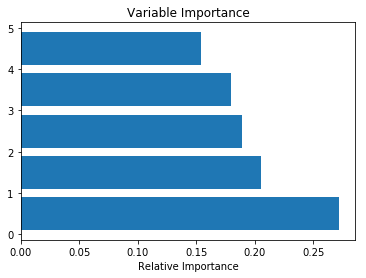

In [31]:
clf = RandomForestClassifier()

clf.fit(sous_ensemble, cible) 

importances=clf.feature_importances_ 
sorted_idx = np.argsort(importances)[::-1]

features =np.arange(1, sous_ensemble.shape[1])

padding = np.arange(sous_ensemble.size/len(sous_ensemble)) + 0.5 
plt.barh(padding, importances[sorted_idx], align='center') 
#plt.yticks(padding, features[sorted_idx]) 
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [32]:

sous_ensemble.shape


(653, 5)

Preprocessing cat

In [33]:
X_cat = np.copy(data_cat) 
for col_id in range(len(X_cat[0])):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True) 
    X_cat[:, col_id] = val_idx

imp_cat = Imputer(missing_values=np.nan, strategy='most_frequent') 
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])


encodeur = OneHotEncoder()
encodeur.fit(X_cat)
X_cat = encodeur.transform(X_cat).toarray()

In [34]:
X_num = np.copy(data_num) 
imp_num = Imputer(missing_values=np.nan, strategy='mean')
imp_num = Imputer(missing_values=0, strategy='mean')
X_num = imp_num.fit_transform(X_num)

In [35]:
cleaned_data = pd.DataFrame(np.concatenate((X_cat, X_num), axis=1))

In [36]:
rc = run_classifiers(X=cleaned_data, Y=cible_final, classifiers=clfs, print_mode=True, mode='min_max_ed')


for clf in clfs:
    algo_apprentissage(clfs[clf], data=cleaned_data, target=cible_final, print_mode=False)

Accuracy for KNN is: 0.727 +/- 0.047
Accuracy for DTC is: 0.799 +/- 0.050
Accuracy for id3 is: 0.807 +/- 0.053
Accuracy for BC is: 0.853 +/- 0.041
Accuracy for RFC is: 0.844 +/- 0.027


In [37]:
for x in range(65):
    if not len(cleaned_data[x]) == 688:
        print(len(cleaned_data[x]))

In [38]:
alles = pd.DataFrame(X_cat)
alles

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [39]:
cleaned_data.shape

(688, 68)

In [40]:
cleaned_data = pd.DataFrame(cleaned_data)

In [41]:
cleaned_data.to_csv('allez.csv')

In [42]:
type(X_num)

numpy.ndarray

### Apprentissage_supervisé_sur_des_données_textuelles

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
path = 'SMSSpamCollection.data'
data = pd.read_csv(path, delimiter='	',header=None, na_values='?')

In [3]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data[1])
analyze = vectorizer.build_analyzer()
X = X.toarray()    

In [4]:
rc = run_classifiers(X=X, Y=data[0], classifiers=clfs, print_mode=True, mode='min_max_ed')



NameError: name 'run_classifiers' is not defined

In [5]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
vectorizer.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it